<a href="https://colab.research.google.com/github/zzhining/ml_basic/blob/main/eda_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

[US Health Insurance Dataset](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset)을 사용하여 데이터 탐색합니다.

## 데이터 불러오기

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv("https://raw.githubusercontent.com/zzhining/ml_basic/main/dataset/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


----

## 결측치 조회

In [48]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

----

## unique 값 확인

In [49]:
print(data["region"].unique().tolist())
print(data["sex"].unique().tolist())
print(data["children"].unique().tolist())
print(data["smoker"].unique().tolist())

['southwest', 'southeast', 'northwest', 'northeast']
['female', 'male']
[0, 1, 3, 2, 5, 4]
['yes', 'no']


----

## **중복값** 조회

In [50]:
data.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [51]:
for i in range(len(data.duplicated())):
    if data.duplicated()[i] == True:
        print(i)

581


In [52]:
data.loc[581]

age                19
sex              male
bmi             30.59
children            0
smoker             no
region      northwest
charges     1639.5631
Name: 581, dtype: object

In [53]:
data.loc[(data["age"] == 19) & (data["sex"] == "male") & (data["bmi"] == 30.59)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


중복값이 존재하는 이유는?<br>
* 나이, 성별, 자녀, bmi, 흡연여부, 지역이 같다면 보험요금 계산 기준이 같을 수 있어 동일한 보험료가 책정 될 수 있다.<br>
* 데이터의 오류

-----

## `sex`, `smoker` 컬럼의 값을 숫자로 변경

In [54]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


-----

## `age`와 `bmi`의 상관관계

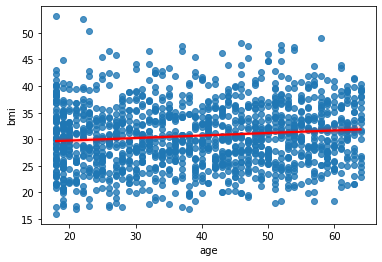

In [58]:
sns.regplot(x=data['age'], y = data['bmi'], line_kws = {'color' : 'red'})

-----

## 변수 간 상관관계

In [55]:
data.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


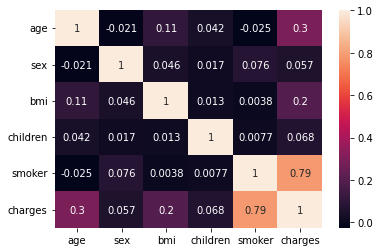

In [56]:
sns.heatmap(data.corr(), annot=True)

> 상관계수에서도 확인했지만, 산점도를 그려봤을 때 무관하다는 것을 알 수 있다.

> 일반적인 상식으로 생각했을 때, 나이가 들어감에 따라 bmi 지수가 양의 상관성을 보여줄 것 같았는데 아니다.

-----

## `age`와 `bmi`의 관계

출처 : https://www.yna.co.kr/view/AKR20140928024300017

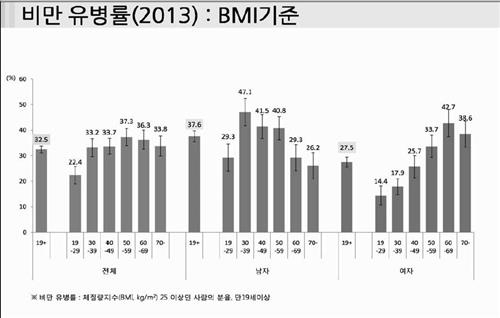

In [59]:
bins = [0,19,29,39,49,59,69,100]
data['age_group'] = np.digitize(data['age'], bins)
data

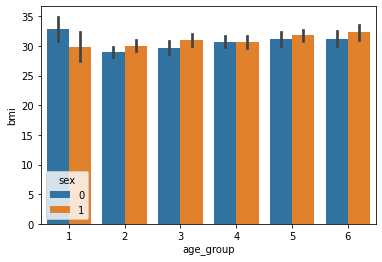

In [61]:
sns.barplot(x=data['age_group'], y = data['bmi'], hue = data['sex'])

기사의 내용과 데이터 분석 결과가 일치하지 않음

-----

## `age`와 `charges`의 관계

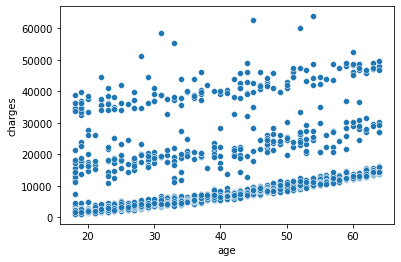

In [68]:
sns.scatterplot(x=data['age'], y=data['charges'])

- 저보험료 구간, 중간보험료 구간, 고보험료 구간으로 나뉘며 구간 안에서만 나이에 따라 상관관계가 있는 것으로 보임.

- 상관계수는 낮게 나왔지만 그래프 상에서는 또 다른 변수가 있음을 알 수 있었다.

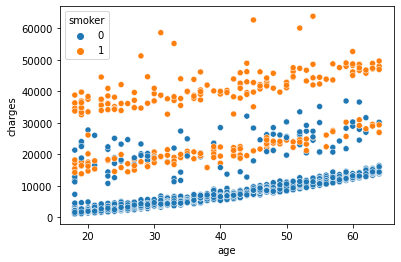

In [73]:
sns.scatterplot(x=data['age'], y=data['charges'], hue = data['smoker'])

-----

## `region`과 `charges`의 관계

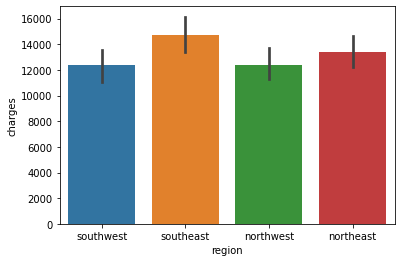

In [66]:
sns.barplot(x=data['region'], y=data['charges'])

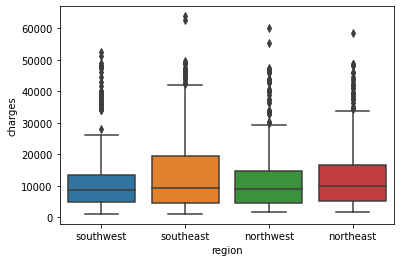

In [67]:
sns.boxplot(x=data['region'], y=data['charges'])

-----

## `bmi`와 `charges`의 관계

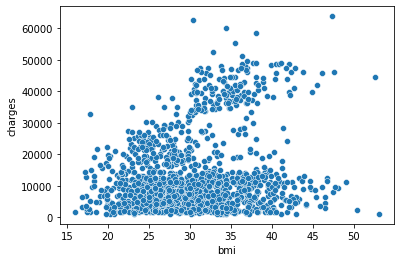

In [33]:
sns.scatterplot(x=data['bmi'], y=data['charges'])

두 변수 간에 뚜렷한 상관관계를 확인하기 어렵다. 

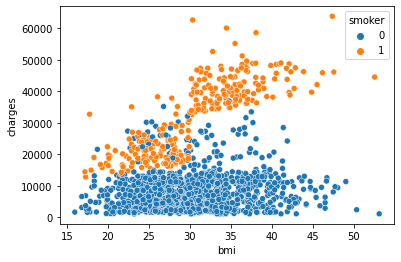

In [65]:
sns.scatterplot(x=data['bmi'], y=data['charges'], hue = data['smoker'])

`smoker`의 여부에 따라 구분하였을 때, 흡연자의 경우, `bmi`와 `charges`간에 강한 양의 상관관계가 나타났다.

-----

## `smoker`와 `charges`의 관계

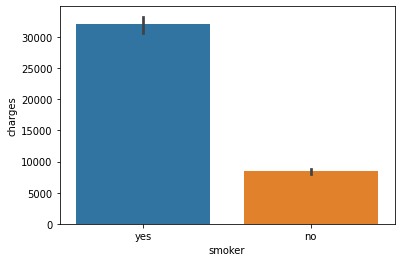

In [35]:
sns.barplot(x=data['smoker'], y = data['charges'])

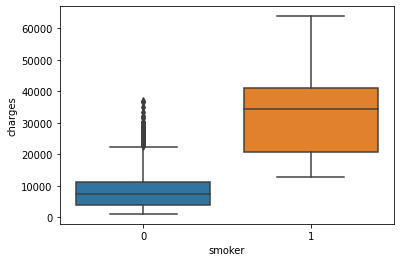

In [63]:
sns.boxplot(x=data['smoker'], y = data['charges'])

`smoker`의 `charges`가 높다. 또한, 흡연자의 경우 보험요금 최소 금액이 비흡연자에 비해 매우 높다.